In [43]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [44]:
def create_entangled_pair(qc, a, b): # creates entangled pair
    qc.h(a) 
    qc.cx(a,b) 

In [45]:
def encode_key(qc,qubit,msg):#the encoding done by Alice to send the key to Bob
    if msg == "00":
        pass  
    elif msg == "10":
        qc.x(qubit) 
    elif msg == "01":
        qc.z(qubit) 
    elif msg == "11":
        qc.z(qubit) 
        qc.x(qubit) 
    else:
        print("key should be in binary")

In [46]:
def decode_key(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [57]:
key="10111010"

In [50]:
n_qubits=len(key)
qc = QuantumCircuit(n_qubits)

for i in range(0,(n_qubits-1),2):
    create_entangled_pair(qc,i,i+1)
    qc.barrier() 
    encode_key(qc,i,key[i:i+2])
    qc.barrier()
    decode_key(qc,i,i+1)
qc.measure_all()

qc.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░            ░            ░       ░ »
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░────────────░────────────░───────░─»
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░            ░            ░       ░ »
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░────────────░────────────░───────░─»
             └───┘ ░       ░ ├───┤      ░ ┌───┐┌───┐ ░      ┌───┐ ░       ░ »
   q_2: ───────────░───────░─┤ H ├──■───░─┤ Z ├┤ X ├─░───■──┤ H ├─░───────░─»
                   ░       ░ └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘ ░       ░ »
   q_3: ───────────░───────░──────┤ X ├─░────────────░─┤ X ├──────░───────░─»
                   ░       ░      └───┘ ░            ░ ├───┤      ░ ┌───┐ ░ »
   q_4: ───────────░───────░────────────░────────────░─┤ H ├──■───░─┤ X ├─░─»
                   ░       ░            ░            ░ └───┘┌─┴─┐ ░ └───┘ ░ »
   q_5: ───────────░───────░────────────░────────────░──────┤ X ├─░───────░─»
                   ░       ░            ░            ░      └───┘ ░       ░ »
   q_6: ───────────░───────░────────────░────────────░────────────░───────░─»
                   ░       ░            ░            ░            ░       ░ »
   q_7: ───────────░───────░────────────░────────────░────────────░───────░─»
                   ░       ░            ░            ░            ░       ░ »
meas: 8/════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ░       ░            ░ ┌─┐                     
«   q_0: ───────────░───────░────────────░─┤M├─────────────────────
«                   ░       ░            ░ └╥┘┌─┐                  
«   q_1: ───────────░───────░────────────░──╫─┤M├──────────────────
«                   ░       ░            ░  ║ └╥┘┌─┐               
«   q_2: ───────────░───────░────────────░──╫──╫─┤M├───────────────
«                   ░       ░            ░  ║  ║ └╥┘┌─┐            
«   q_3: ───────────░───────░────────────░──╫──╫──╫─┤M├────────────
«             ┌───┐ ░       ░            ░  ║  ║  ║ └╥┘┌─┐         
«   q_4: ──■──┤ H ├─░───────░────────────░──╫──╫──╫──╫─┤M├─────────
«        ┌─┴─┐└───┘ ░       ░            ░  ║  ║  ║  ║ └╥┘┌─┐      
«   q_5: ┤ X ├──────░───────░────────────░──╫──╫──╫──╫──╫─┤M├──────
«        ├───┤      ░ ┌───┐ ░      ┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
«   q_6: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
«        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
«   q_7: ─────┤ X ├─░───────░─┤ X ├──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
«             └───┘ ░       ░ └───┘      ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
«meas: 8/═══════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
«                                           0  1  2  3  4  5  6  7

{'10101110': 1024}


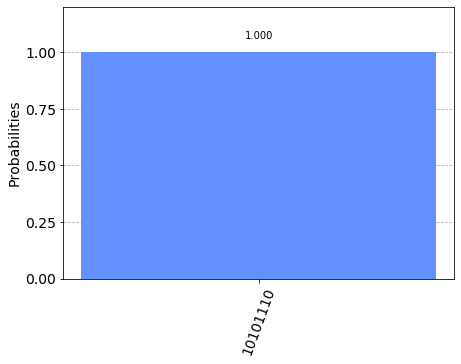

In [51]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

# Running on IBM Quantum Computer 

In [58]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 15 and
                                   x.configuration().n_qubits >= 8 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
t_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(t_qc)
job = backend.run(qobj)

ibmqfactory.load_account:WARNING:2021-04-11 18:34:23,054: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_16_melbourne


C:\Users\RAVI\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  # This is added back by InteractiveShellApp.init_path()


In [59]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [60]:
result = job.result()
result.get_counts(qc)

{'00010010': 1,
 '00010100': 1,
 '00011100': 3,
 '00011110': 8,
 '00100000': 1,
 '00100010': 4,
 '00100100': 1,
 '00100101': 1,
 '00100110': 6,
 '00100111': 1,
 '00101000': 2,
 '00101001': 3,
 '00101010': 8,
 '00101011': 1,
 '00101100': 9,
 '00101110': 51,
 '00101111': 1,
 '00110000': 1,
 '00110010': 1,
 '00111000': 1,
 '00111010': 3,
 '00111100': 5,
 '00111110': 23,
 '01001101': 1,
 '01001110': 2,
 '01011110': 1,
 '00000110': 2,
 '01100110': 1,
 '01101010': 3,
 '01101100': 1,
 '01101110': 6,
 '01101111': 1,
 '01111010': 2,
 '01111110': 1,
 '10000000': 1,
 '10000010': 5,
 '10000100': 5,
 '10000110': 25,
 '10001000': 5,
 '10001001': 1,
 '10001010': 11,
 '10001100': 20,
 '10001101': 1,
 '10001110': 75,
 '10001111': 2,
 '10010010': 1,
 '10010100': 3,
 '10010110': 6,
 '10011000': 2,
 '10011010': 8,
 '10011100': 8,
 '10011110': 33,
 '10011111': 1,
 '00001010': 3,
 '10100000': 4,
 '10100001': 1,
 '10100010': 13,
 '10100100': 9,
 '10100101': 2,
 '10100110': 35,
 '10101000': 11,
 '10101001': 2

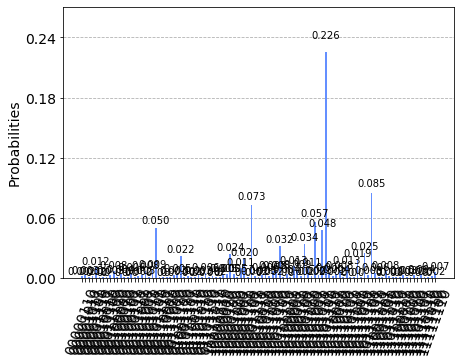

In [61]:
result = job.result()
plot_histogram(result.get_counts(qc))

Acknowledgement : I am thankfull to the Qiskit Documentation which really helped me in this Project.